In [1]:
import model
from model import read_image
from model import columnIdx

import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
samples = model.GetSampleFullname()

for number in range(10):
    print(samples[number])


['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
['IMG/center_2016_12_01_13_30_48_287.jpg', ' IMG/left_2016_12_01_13_30_48_287.jpg', ' IMG/right_2016_12_01_13_30_48_287.jpg', ' 0', ' 0', ' 0', ' 22.14829']
['IMG/center_2016_12_01_13_30_48_404.jpg', ' IMG/left_2016_12_01_13_30_48_404.jpg', ' IMG/right_2016_12_01_13_30_48_404.jpg', ' 0', ' 0', ' 0', ' 21.87963']
['IMG/center_2016_12_01_13_31_12_937.jpg', ' IMG/left_2016_12_01_13_31_12_937.jpg', ' IMG/right_2016_12_01_13_31_12_937.jpg', ' 0', ' 0', ' 0', ' 1.453011']
['IMG/center_2016_12_01_13_31_13_037.jpg', ' IMG/left_2016_12_01_13_31_13_037.jpg', ' IMG/right_2016_12_01_13_31_13_037.jpg', ' 0', ' 0', ' 0', ' 1.438419']
['IMG/center_2016_12_01_13_31_13_177.jpg', ' IMG/left_2016_12_01_13_31_13_177.jpg', ' IMG/right_2016_12_01_13_31_13_177.jpg', ' 0', ' 0', ' 0', ' 1.418236']
['IMG/center_2016_12_01_13_31_13_279.jpg', ' IMG/left_2016_12_01_13_31_13_279.jpg', ' IMG/right_2016_12_01_13_31_13_279.jpg', ' 0', ' 0', ' 0', '

IMG/center_2016_12_01_13_30_48_287.jpg
name :  ./udacity-data/IMG/center_2016_12_01_13_30_48_287.jpg
shape:  (160, 320, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


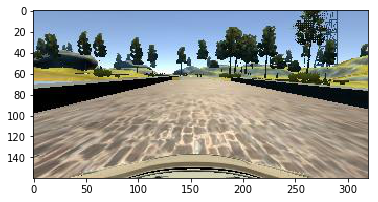

In [2]:
print( samples[1][columnIdx.center.value] )

name = './' + model.traintag + samples[1][columnIdx.center.value].strip().split('\\')[-1]
print('name : ', name)
#image, angle = read_image(name, center_angle, camera)

img, angle = read_image(name, 0, columnIdx.center.value)
img = np.array(img)
print('shape: ', img.shape)
print(type(img) )
print(type(img) )
plt.imshow(img)
plt.show()



In [3]:
from model import resize_img

print(img.shape)
new_img = img[:,:,0]
print(new_img.shape)
new_img = new_img.reshape(new_img.shape[0], new_img.shape[1], 1)
print(new_img.shape)
resized = resize_img(new_img)
print(resized)
print(type(resized) )

#resized = resize_img(img)
#new_img = img.reshape(160, 320)
#plt.imshow(resized)
#plt.show()


(160, 320, 3)
(160, 320)
(160, 320, 1)


Using TensorFlow backend.


Tensor("Squeeze:0", shape=(64, 64, 1), dtype=float32)
<class 'tensorflow.python.framework.ops.Tensor'>


In [4]:
df = pd.DataFrame(samples)
# drop the column name.
df = df.drop(df.index[0] )
#print(df[columnIdx.steering.value])


columnIdx.steering:  3


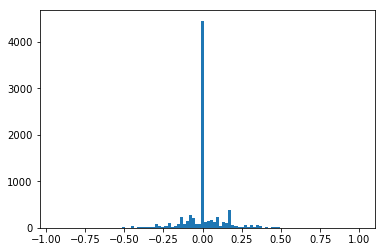

In [5]:
#df[3].astype(float).hist()
print('columnIdx.steering: ', columnIdx.steering.value)
df3 = df[columnIdx.steering.value].astype(float)
ax = df3.hist(bins = 100)
ax.grid(False)


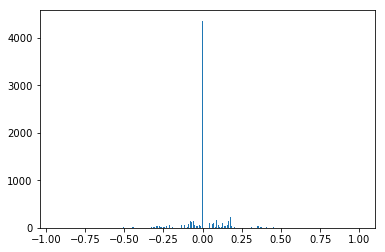

In [6]:
ax = df3.hist(bins = 500)
ax.grid(False)


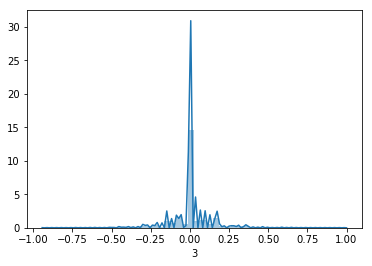

In [10]:
sns.distplot(df3)


In [9]:


need a image of resize image here.





SyntaxError: invalid syntax (<ipython-input-9-49432d3fd03c>, line 3)